# Activity 5.01: OLS Classifier - 2 Class Classifier (with Answers)

In [1]:
pip install pandas==1.0.3

Note: you may need to restart the kernel to use updated packages.


In [2]:
import struct
import numpy as np
import gzip
import urllib.request
import matplotlib.pyplot as plt
from array import array
from sklearn.linear_model import LinearRegression

## Load the MNIST data into memory

In [3]:
with gzip.open('../Datasets/train-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))

    img = np.array(array("B", f.read())).reshape((size, rows, cols))

In [4]:
with gzip.open('../Datasets/train-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels = np.array(array("B", f.read()))

In [5]:
with gzip.open('../Datasets/t10k-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))

    img_test = np.array(array("B", f.read())).reshape((size, rows, cols))

In [6]:
with gzip.open('../Datasets/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels_test = np.array(array("B", f.read()))

Visualise a sample of the data

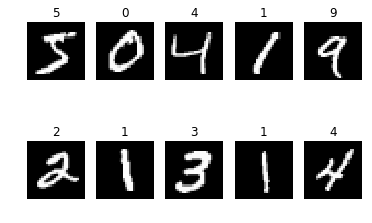

In [7]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img[i], cmap='gray');
    plt.title(f'{labels[i]}');
    plt.axis('off')

## Construct a Linear Classifier Model to Classify Digits 0 / 1

The first model we are going to create is to determine if the samples are either the digits 0 or 1.  To do this we first need to select only those samples.

In [8]:
samples_0_1 = np.where((labels == 0) | (labels == 1))[0]
images_0_1 = img[samples_0_1]
labels_0_1 = labels[samples_0_1]

samples_0_1_test = np.where((labels_test == 0) | (labels_test == 1))
images_0_1_test = img_test[samples_0_1_test].reshape((-1, rows * cols))
labels_0_1_test = labels_test[samples_0_1_test]

Visualising the selected information:

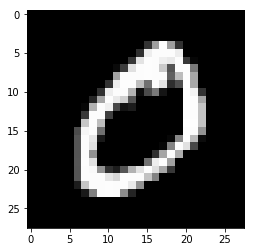

In [9]:
sample_0 = np.where((labels == 0))[0][0]
plt.imshow(img[sample_0], cmap='gray');

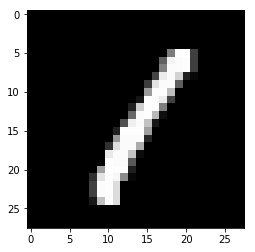

In [10]:
sample_1 = np.where((labels == 1))[0][0]
plt.imshow(img[sample_1], cmap='gray');

In order to provide the image information to the Logistic model we must first flatten the data out so that each image is 1 x 784 pixels in shape.

In [11]:
images_0_1 = images_0_1.reshape((-1, rows * cols))
images_0_1.shape

(12665, 784)

Let's construct the model, use the sklearn LogisticRegression API and call the fit function.

In [12]:
model = LinearRegression()
model.fit(X=images_0_1, y=labels_0_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Determine the training set accuracy

In [13]:
model.score(X=images_0_1, y=labels_0_1)

0.9705784843212548

Determine the label predictions for each of the training samples, using a threshold of 0.5.  Values greater than 0.5 classify as 1, less than or equal to classify as 0.

In [14]:
y_pred = model.predict(images_0_1) > 0.5
y_pred = y_pred.astype(int)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

Compute the classification accuracy of the predicted training values vs the ground truth

In [15]:
np.sum(y_pred == labels_0_1) / len(labels_0_1)

0.9947887879984209

Compare the performance against the test set

In [16]:
y_pred = model.predict(images_0_1_test) > 0.5
y_pred = y_pred.astype(int)
np.sum(y_pred == labels_0_1_test) / len(labels_0_1_test)

0.9933806146572104